In [2]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from trustee import ClassificationTrustee

from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [3]:
dataset_path = '../datasets/combined_batches.csv'
test_dataset_path = '../datasets/test_batches.csv'
features_to_drop = ['rolling_std_time_since_last_DNS', 'rolling_var_time_since_last_DNS', 'ratio_time_since_last_DNS_avg', 'rolling_avg_time_since_last_DNS', 'time_since_last_DNS', 'curr_state']
scaler = StandardScaler()

In [7]:
df = pd.read_csv(dataset_path)
df['curr_state'] = df['curr_state'].replace({1: 0, 2: 0, 3: 1})
targets = df['curr_state']
features = df.drop(['curr_state'], axis=1)
scaler = StandardScaler()


median_dns = features['time_since_last_DNS'].median()
features['ratio_time_since_last_DNS'] = features['time_since_last_DNS'] / median_dns

avg_dns = features['rolling_avg_time_since_last_DNS'].median()
features['ratio_time_since_last_DNS_avg'] = features['time_since_last_DNS'] / avg_dns

features['time_since_last_DNS' ] = scaler.fit_transform(features['time_since_last_DNS'].values.reshape(-1, 1))
features['ratio_time_since_last_DNS' ] = scaler.fit_transform(features['ratio_time_since_last_DNS'].values.reshape(-1, 1))


features = features.drop(['rolling_avg_time_since_last_DNS', 'rolling_var_time_since_last_DNS', 'rolling_std_time_since_last_DNS'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)


clf = RandomForestClassifier(
    n_estimators=10,
    max_depth=4,
    min_samples_split=6, 
    min_samples_leaf=8, 
    max_features='sqrt', 
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Playing/Paused', 'Buffering']))


importances = clf.feature_importances_
feature_names = features.columns
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

for feature, importance in feature_importances:
    print(f"{feature}: {importance}")
    

Accuracy: 0.8912014963691044

Classification Report:
                 precision    recall  f1-score   support

Playing/Paused       0.89      0.95      0.92    835183
     Buffering       0.88      0.78      0.83    419053

      accuracy                           0.89   1254236
     macro avg       0.89      0.86      0.87   1254236
  weighted avg       0.89      0.89      0.89   1254236

rolling_median_time_since_last_DNS: 0.3350874294888655
time_since_last_DNS: 0.25728902783627194
ratio_time_since_last_DNS_avg: 0.2459751592885186
ratio_time_since_last_DNS: 0.16164838338634405


In [8]:

test_df = pd.read_csv('../datasets/test_batches.csv')
test_df['curr_state'] = test_df['curr_state'].replace({1: 0, 2: 0, 3: 1})
y_test = test_df['curr_state']
X_test = test_df.drop(['curr_state'], axis=1)

median_dns = X_test['time_since_last_DNS'].median()

X_test['ratio_time_since_last_DNS'] = X_test['time_since_last_DNS'] / median_dns
avg_dns = X_test['rolling_avg_time_since_last_DNS'].median()
X_test['ratio_time_since_last_DNS_avg'] = X_test['time_since_last_DNS'] / avg_dns

X_test['time_since_last_DNS' ] = scaler.fit_transform(X_test['time_since_last_DNS'].values.reshape(-1, 1))
X_test['ratio_time_since_last_DNS' ] = scaler.fit_transform(X_test['ratio_time_since_last_DNS'].values.reshape(-1, 1))
X_test = X_test.drop(['rolling_avg_time_since_last_DNS', 'rolling_var_time_since_last_DNS', 'rolling_std_time_since_last_DNS'], axis=1)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Playing/Paused', 'Buffering'])

print("Test Dataset Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Test Dataset Accuracy: 0.8998874918267517

Classification Report:
                 precision    recall  f1-score   support

Playing/Paused       0.91      0.95      0.93    843198
     Buffering       0.88      0.81      0.84    421599

      accuracy                           0.90   1264797
     macro avg       0.89      0.88      0.88   1264797
  weighted avg       0.90      0.90      0.90   1264797



Training score of pruned DT: 0.9999972480531207
Model explanation global fidelity report:


/Users/luisbravo/Projects/detecting_pauses/venv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.99      0.98   2067877
           1       0.97      0.96      0.96    858672

    accuracy                           0.98   2926549
   macro avg       0.98      0.97      0.97   2926549
weighted avg       0.98      0.98      0.98   2926549

Model explanation score report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91   1952007
           1       0.86      0.75      0.80    974542

    accuracy                           0.88   2926549
   macro avg       0.87      0.84      0.86   2926549
weighted avg       0.88      0.88      0.87   2926549



[Text(0.25, 0.9166666666666666, 'ratio_time_since_last_DNS_avg <= 1.272\ngini = 0.414\nsamples = 1024291\nvalue = [724118, 300173]\nclass = Buffering'),
 Text(0.125, 0.75, 'gini = 0.04\nsamples = 615529\nvalue = [602874, 12655]\nclass = Buffering'),
 Text(0.375, 0.75, 'rolling_median_time_since_last_DNS <= 1.301\ngini = 0.417\nsamples = 408762\nvalue = [121244, 287518]\nclass = Paused'),
 Text(0.25, 0.5833333333333334, 'gini = 0.072\nsamples = 251553\nvalue = [9364, 242189]\nclass = Paused'),
 Text(0.5, 0.5833333333333334, 'time_since_last_DNS <= 1.572\ngini = 0.41\nsamples = 157209\nvalue = [111880, 45329]\nclass = Buffering'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 104604\nvalue = [104604, 0]\nclass = Buffering'),
 Text(0.625, 0.4166666666666667, 'rolling_median_time_since_last_DNS <= 1.708\ngini = 0.238\nsamples = 52605\nvalue = [7276, 45329]\nclass = Paused'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 43426\nvalue = [0, 43426]\nclass = Paused'),
 Text(0.75, 0.25, 'ti

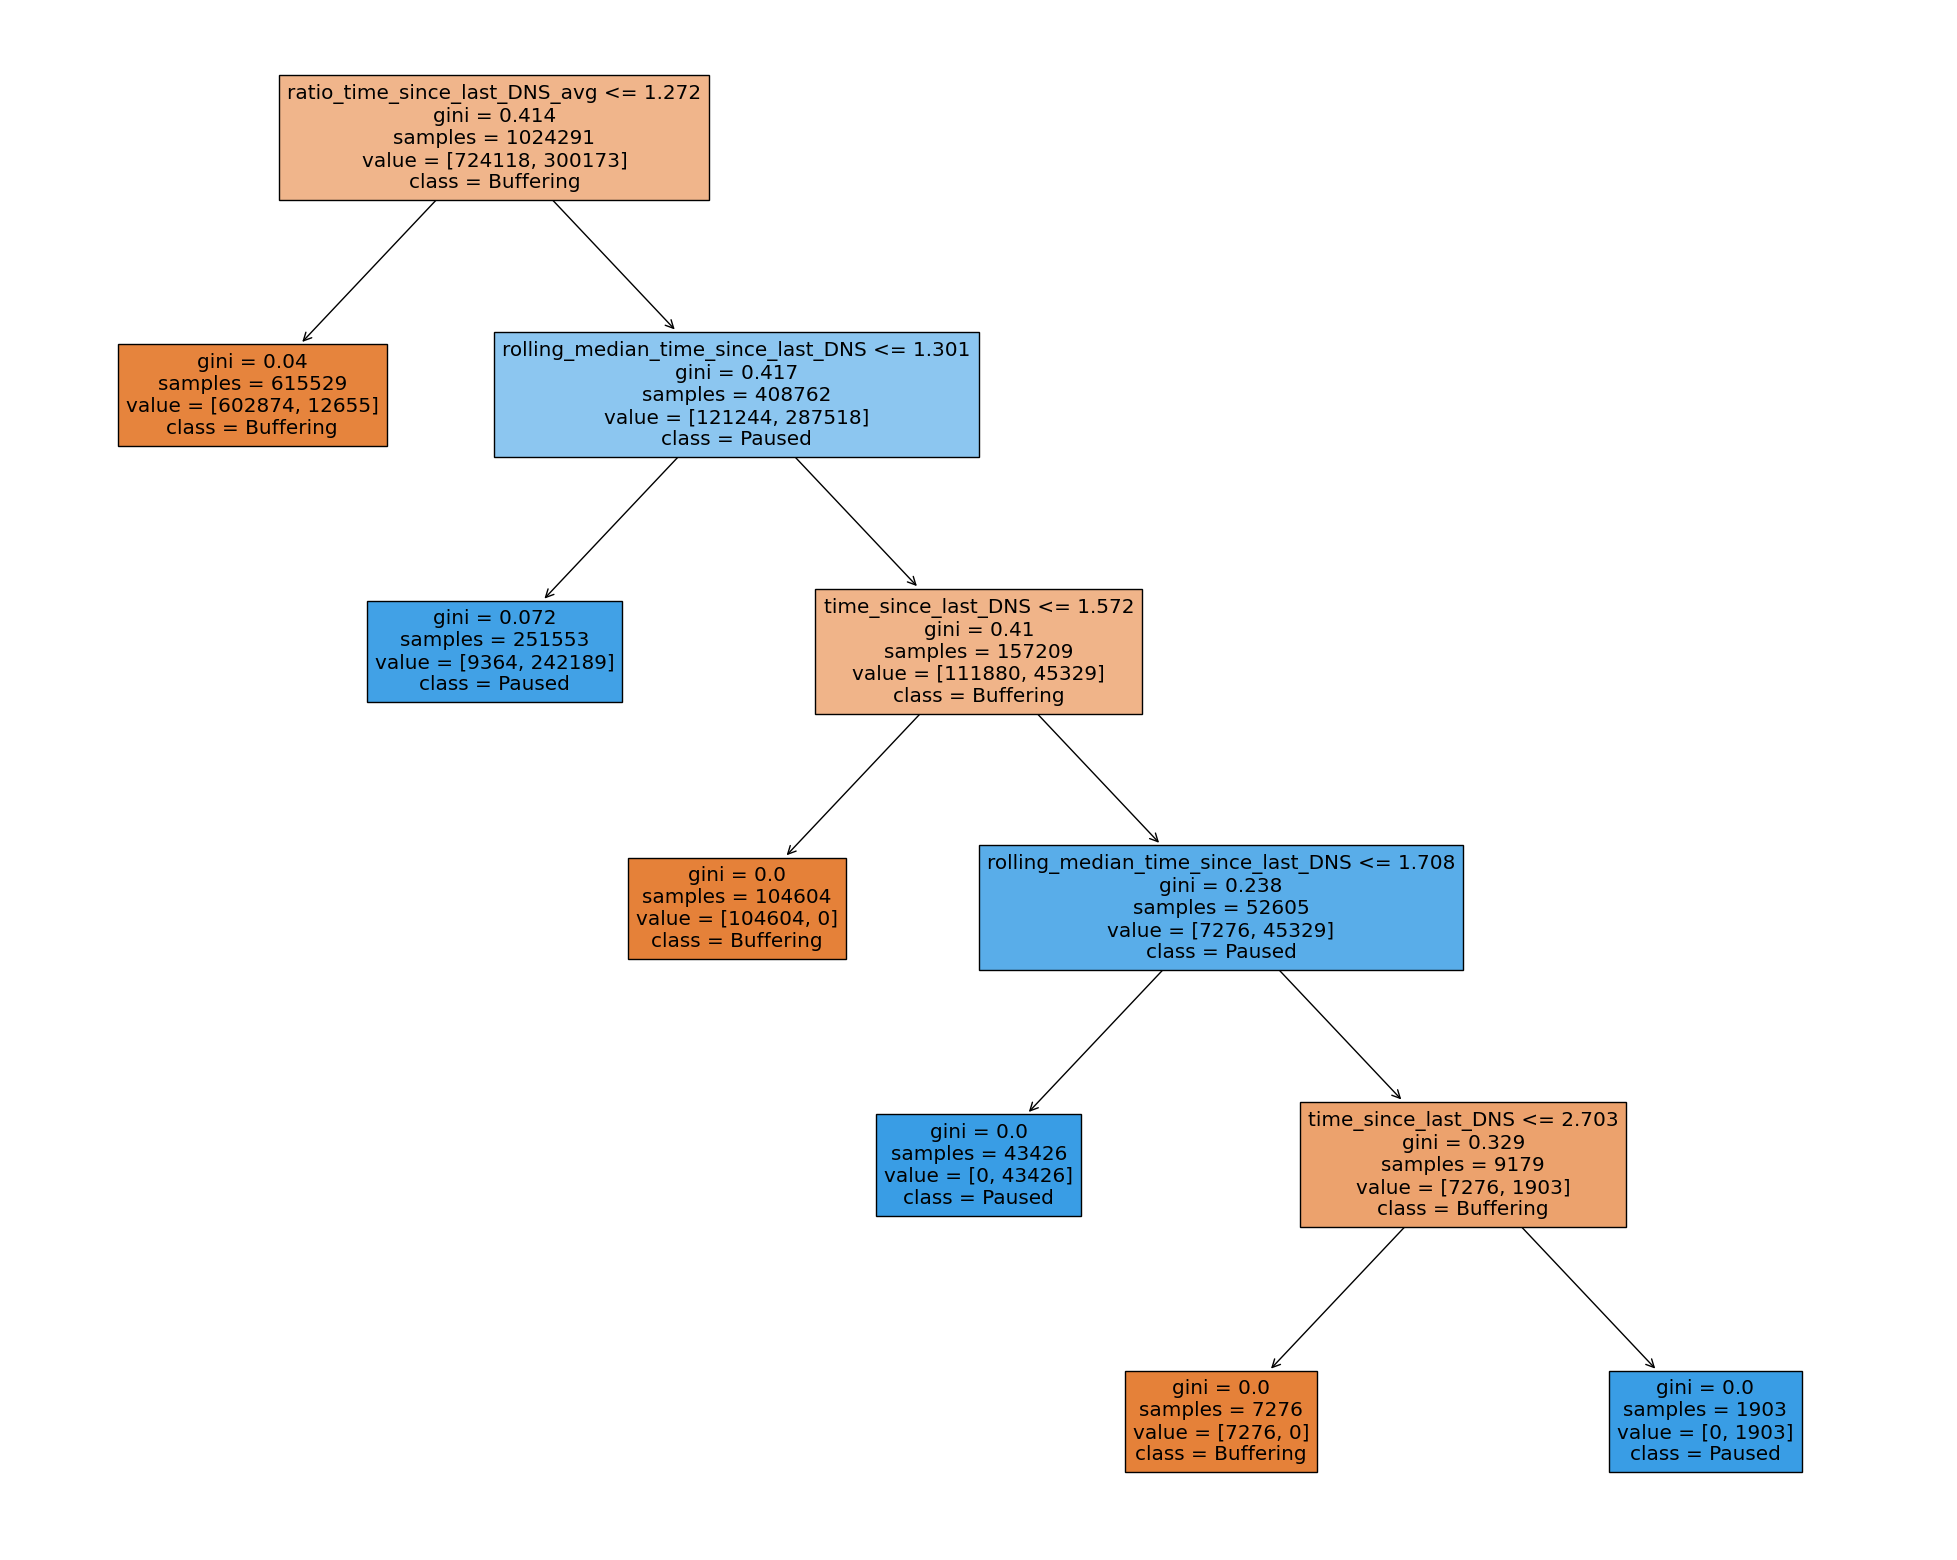

In [6]:

trustee = ClassificationTrustee(expert=clf)
trustee.fit(X_train, y_train, num_samples=len(X_train) // 2, num_iter=10,train_size=0.70)

_, dt, _, score = trustee.explain()
print(f"Training score of pruned DT: {score}")
dt_y_pred = dt.predict(X_train)
print("Model explanation global fidelity report:")
print(metrics.classification_report(clf.predict(X_train), dt_y_pred))
print("Model explanation score report:")
print(metrics.classification_report(y_train, dt_y_pred))

fig = plt.figure(figsize=(25,20))
plot_tree(dt, feature_names=X_train.columns, class_names=sorted(["Playing", "Paused", "Buffering"]), filled=True, max_depth=7)